In [2]:
# 1. Import delle librerie fondamentali
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Impostazioni grafiche (opzionale, ma rende i grafici più belli)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# 3. Caricamento del dataset
file_path = 'dataset/all_players.csv' # <-- MODIFICA QUI SE NECESSARIO
df = pd.read_csv(file_path)

print("Dataset caricato con successo!")
print(f"Il dataset è composto da {df.shape[0]} giocatori e {df.shape[1]} attributi.")

Dataset caricato con successo!
Il dataset è composto da 17737 giocatori e 58 attributi.


In [3]:
df.head()  # Mostra le prime righe del dataset per una rapida ispezione

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [4]:
# --- CELLA 2: Pulizia e Preparazione dei Dati ---
import numpy as np

print("Inizio pulizia e preparazione dati...")

# Creiamo una copia per non modificare il DataFrame originale (buona prassi)
df_cleaned = df.copy()

# 1. Rimuovere colonne inutili (indici, url, rank)
cols_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'url', 'Rank']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_cleaned.columns]
df_cleaned = df_cleaned.drop(columns=cols_to_drop_existing)

# 2. Convertire 'Height' e 'Weight' in valori numerici
# Usiamo .str.extract() con una "regular expression" (regex) per estrarre solo i numeri
df_cleaned['Height_cm'] = df_cleaned['Height'].astype(str).str.extract(r'(\d+)cm').astype(float)
df_cleaned['Weight_kg'] = df_cleaned['Weight'].astype(str).str.extract(r'(\d+)kg').astype(float)
df_cleaned = df_cleaned.drop(columns=['Height', 'Weight']) # Rimuoviamo le vecchie colonne

# 3. Gestire NaN (valori vuoti) per colonne categoriche
df_cleaned['Alternative positions'] = df_cleaned['Alternative positions'].fillna('None')
df_cleaned['play style'] = df_cleaned['play style'].fillna('None')

# 4. Gestire i dati dei Portieri (GK) - Fase 1: Riempire NaN
# Le colonne GK... sono vuote (NaN) per i giocatori di movimento. Le impostiamo a 0.
gk_stat_cols = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
for col in gk_stat_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna(0)

# 5. Gestire i dati dei Portieri (GK) - Fase 2: Unificazione
# Rinominiamo le 6 stats base per unificare Giocatori e Portieri
rename_map = {
    'PAC': 'Stat1_PAC_GK-DIV', # Tuffo (DIV) per i GK
    'SHO': 'Stat2_SHO_GK-HAN', # Presa (HAN) per i GK
    'PAS': 'Stat3_PAS_GK-KIC', # Rinvio (KIC) per i GK
    'DRI': 'Stat4_DRI_GK-REF', # Riflessi (REF) per i GK
    'DEF': 'Stat5_DEF_GK-SPD', # Velocità (SPD) per i GK
    'PHY': 'Stat6_PHY_GK-POS'  # Piazzamento (POS) per i GK
}
df_cleaned = df_cleaned.rename(columns=rename_map)

# 6. Gestire i dati dei Portieri (GK) - Fase 3: Rimozione duplicati
# Ora che i dati sono unificati, queste colonne sono ridondanti
cols_to_drop_gk_duplicates = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
cols_to_drop_gk_duplicates_existing = [col for col in cols_to_drop_gk_duplicates if col in df_cleaned.columns]
df_cleaned = df_cleaned.drop(columns=cols_to_drop_gk_duplicates_existing)

# 7. Rimuoviamo eventuali righe con dati critici mancanti
df_cleaned = df_cleaned.dropna(subset=['Height_cm', 'Weight_kg'])

print("Pulizia completata.")
print(f"Il dataset pulito ha {df_cleaned.shape[0]} righe e {df_cleaned.shape[1]} colonne.")

# 8. Controlliamo il risultato
print("\n--- Prime 5 righe del DataFrame Pulito ---")
display(df_cleaned.head())

print("\n--- Informazioni sul DataFrame Pulito (Tipi di Dati e Valori Mancanti) ---")
# .info() confermerà che non ci sono più valori 'non-null' mancanti
df_cleaned.info()

Inizio pulizia e preparazione dati...
Pulizia completata.
Il dataset pulito ha 17737 righe e 49 colonne.

--- Prime 5 righe del DataFrame Pulito ---


,Name,OVR,Stat1_PAC_GK-DIV,Stat2_SHO_GK-HAN,Stat3_PAS_GK-KIC,Stat4_DRI_GK-REF,Stat5_DEF_GK-SPD,Stat6_PHY_GK-POS,Acceleration,Sprint Speed,...,Skill moves,Preferred foot,Alternative positions,Age,Nation,League,Team,play style,Height_cm,Weight_kg
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,5,Right,LW,25,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",182.0,75.0
1,Rodri,91,66,80,86,84,87,85,65,66,...,3,Right,CM,28,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",191.0,82.0
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,3,Left,None,24,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",195.0,94.0
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,4,Right,CM,21,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",186.0,75.0
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,5,Right,"ST, LM",24,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",176.0,73.0



--- Informazioni sul DataFrame Pulito (Tipi di Dati e Valori Mancanti) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   17737 non-null  object 
 1   OVR                    17737 non-null  int64  
 2   Stat1_PAC_GK-DIV       17737 non-null  int64  
 3   Stat2_SHO_GK-HAN       17737 non-null  int64  
 4   Stat3_PAS_GK-KIC       17737 non-null  int64  
 5   Stat4_DRI_GK-REF       17737 non-null  int64  
 6   Stat5_DEF_GK-SPD       17737 non-null  int64  
 7   Stat6_PHY_GK-POS       17737 non-null  int64  
 8   Acceleration           17737 non-null  int64  
 9   Sprint Speed           17737 non-null  int64  
 10  Positioning            17737 non-null  int64  
 11  Finishing              17737 non-null  int64  
 12  Shot Power             17737 non-null  int64  
 13  Long Shots             17737 n

In [ ]:
# --- CELLA 3: Statistiche Descrittive Numeriche ---

print("--- 2.1 Statistiche Descrittive Numeriche ---")

# Selezioniamo le colonne numeriche chiave per l'analisi
numerical_cols = [
    'OVR', 'Age', 'Height_cm', 'Weight_kg', 'Weak foot', 'Skill moves',
    'Stat1_PAC_GK-DIV', 'Stat2_SHO_GK-HAN', 'Stat3_PAS_GK-KIC',
    'Stat4_DRI_GK-REF', 'Stat5_DEF_GK-SPD', 'Stat6_PHY_GK-POS'
]

# .describe() calcola tutte le statistiche fondamentali
# Usiamo .transpose() (o .T) per girare la tabella e renderla più leggibile
desc_stats_num = df_cleaned[numerical_cols].describe()

display(desc_stats_num.transpose())

In [5]:
# --- CELLA 3: Statistiche Descrittive Numeriche ---

print("--- 2.1 Statistiche Descrittive Numeriche ---")

# Selezioniamo le colonne numeriche chiave per l'analisi
numerical_cols = [
    'OVR', 'Age', 'Height_cm', 'Weight_kg', 'Weak foot', 'Skill moves',
    'Stat1_PAC_GK-DIV', 'Stat2_SHO_GK-HAN', 'Stat3_PAS_GK-KIC',
    'Stat4_DRI_GK-REF', 'Stat5_DEF_GK-SPD', 'Stat6_PHY_GK-POS'
]

# .describe() calcola tutte le statistiche fondamentali
# Usiamo .transpose() (o .T) per girare la tabella e renderla più leggibile
desc_stats_num = df_cleaned[numerical_cols].describe()

display(desc_stats_num.transpose())

--- 2.1 Statistiche Descrittive Numeriche ---


,count,mean,std,min,25%,50%,75%,max
OVR,17737.0,66.796245,7.030997,47.0,62.0,67.0,71.0,91.0
Age,17737.0,25.744151,4.640097,17.0,22.0,25.0,29.0,44.0
Height_cm,17737.0,180.706602,7.733332,149.0,175.0,181.0,186.0,206.0
Weight_kg,17737.0,73.950724,8.024050,45.0,69.0,74.0,79.0,105.0
Weak foot,17737.0,2.947229,0.678567,1.0,3.0,3.0,3.0,5.0
Skill moves,17737.0,2.409201,0.793737,1.0,2.0,2.0,3.0,5.0
Stat1_PAC_GK-DIV,17737.0,68.237921,10.587756,29.0,62.0,69.0,75.0,97.0
Stat2_SHO_GK-HAN,17737.0,54.846197,13.858698,20.0,46.0,57.0,65.0,93.0
Stat3_PAS_GK-KIC,17737.0,59.152506,9.826691,25.0,53.0,60.0,66.0,94.0
Stat4_DRI_GK-REF,17737.0,64.205728,9.359164,29.0,59.0,65.0,70.0,92.0


In [6]:
# --- CELLA 4: Statistiche Descrittive Categoriche ---

print("--- 2.2 Statistiche Descrittive Categoriche (Frequenze) ---")

# Distribuzione Posizioni (Top 10)
print("\n--- Distribuzione 'Position' (Top 10) ---")
display(df_cleaned['Position'].value_counts().head(10))

# Distribuzione Piede Preferito (con percentuali)
print("\n--- Distribuzione 'Preferred foot' (%) ---")
# 'normalize=True' calcola la proporzione (es. 0.76)
display((df_cleaned['Preferred foot'].value_counts(normalize=True) * 100).round(2))

# Distribuzione Nazioni (Top 10)
print("\n--- Top 10 'Nation' ---")
display(df_cleaned['Nation'].value_counts().head(10))

# Distribuzione Leghe (Top 10)
print("\n--- Top 10 'League' ---")
display(df_cleaned['League'].value_counts().head(10))

--- 2.2 Statistiche Descrittive Categoriche (Frequenze) ---

--- Distribuzione 'Position' (Top 10) ---


Position
CB     3185
ST     2425
CM     2139
GK     1999
CDM    1447
RB     1404
LB     1333
LM     1035
CAM    1024
RM      961
Name: count, dtype: int64


--- Distribuzione 'Preferred foot' (%) ---


Preferred foot
Right    76.68
Left     23.32
Name: proportion, dtype: float64


--- Top 10 'Nation' ---


Nation
England           1590
Germany           1324
Spain             1151
France             878
Argentina          865
United States      673
Italy              533
Holland            439
Korea Republic     412
Sweden             403
Name: count, dtype: int64


--- Top 10 'League' ---


League
Sudamericana        826
MLS                 762
EFL Championship    683
EFL League One      615
Premier League      597
Libertadores        574
EFL League Two      562
Serie A Enilive     537
LALIGA EA SPORTS    529
Bundesliga 2        503
Name: count, dtype: int64

### DISTRIBUZIONE OVERALL

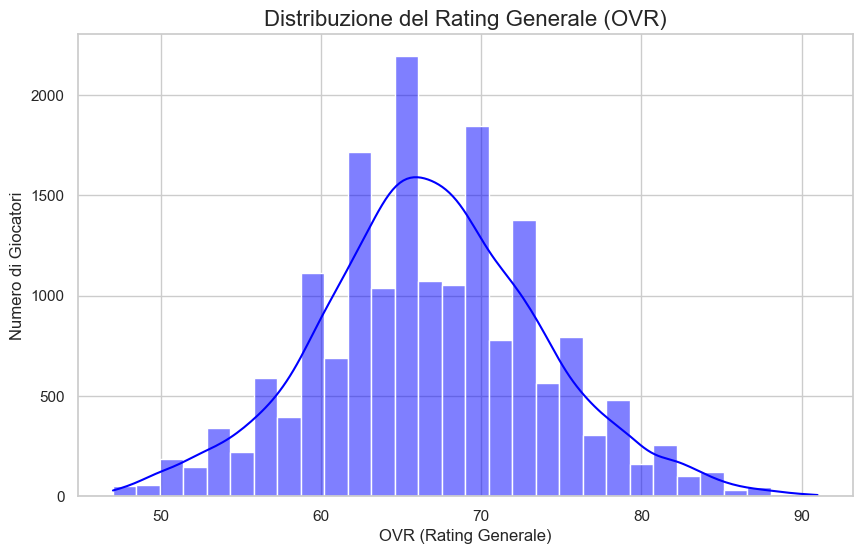

In [7]:
# --- CELLA 5: Visualizzazione - Distribuzione OVR ---

# (Le impostazioni grafiche e le librerie sono già state caricate nella Cella 1)

plt.figure(figsize=(10, 6)) # Puoi regolare la dimensione se necessario
sns.histplot(df_cleaned['OVR'], kde=True, bins=30, color='blue')
plt.title('Distribuzione del Rating Generale (OVR)', fontsize=16)
plt.xlabel('OVR (Rating Generale)', fontsize=12)
plt.ylabel('Numero di Giocatori', fontsize=12)
plt.show() # Mostra il grafico nel notebook

### DISTRIBUZIONE ETA'

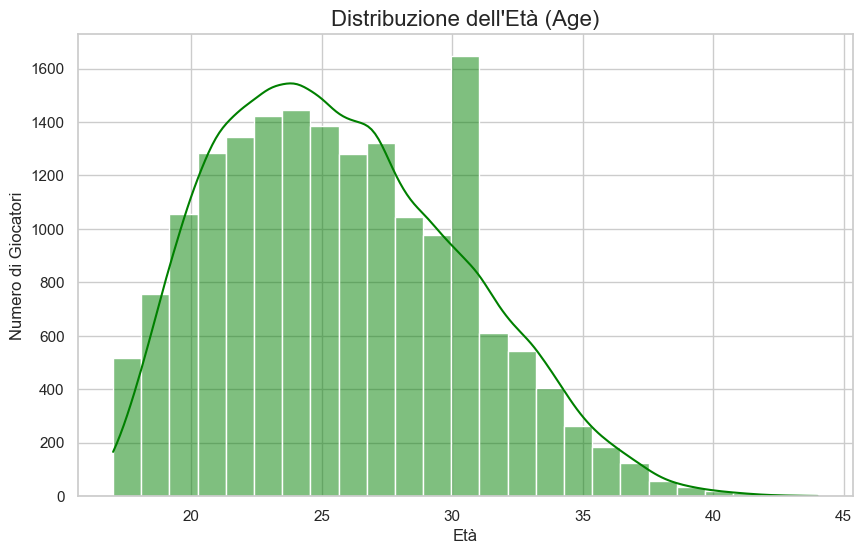

In [8]:
# --- CELLA 6: Visualizzazione - Distribuzione Età ---

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=25, color='green')
plt.title('Distribuzione dell\'Età (Age)', fontsize=16)
plt.xlabel('Età', fontsize=12)
plt.ylabel('Numero di Giocatori', fontsize=12)
plt.show()

### MAPPA DI CORRELAZIONE

Calcolo della mappa di correlazione...


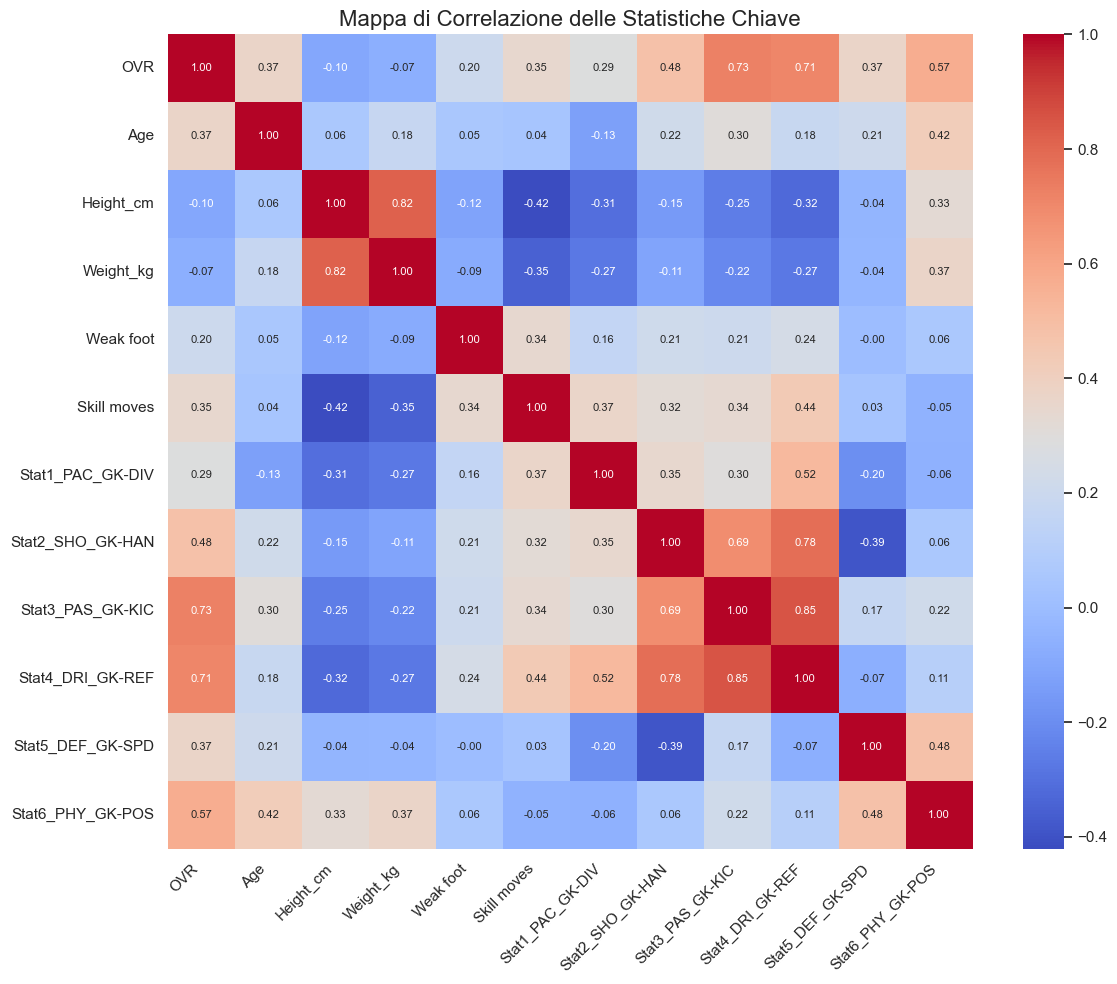

In [9]:
# --- CELLA 7: Visualizzazione - Mappa di Correlazione ---

print("Calcolo della mappa di correlazione...")

# Usiamo le stesse colonne numeriche della Cella 3
numerical_cols = [
    'OVR', 'Age', 'Height_cm', 'Weight_kg', 'Weak foot', 'Skill moves',
    'Stat1_PAC_GK-DIV', 'Stat2_SHO_GK-HAN', 'Stat3_PAS_GK-KIC',
    'Stat4_DRI_GK-REF', 'Stat5_DEF_GK-SPD', 'Stat6_PHY_GK-POS'
]

# 1. Calcoliamo la matrice di correlazione
corr_matrix = df_cleaned[numerical_cols].corr()

# 2. Creiamo il grafico (heatmap)
plt.figure(figsize=(12, 10)) # Grafico più grande per leggibilità
sns.heatmap(
    corr_matrix, 
    annot=True,     # Mostra i numeri (coefficienti)
    cmap='coolwarm', # Schema di colori (Rosso=Positivo, Blu=Negativo)
    fmt='.2f',      # Formatta i numeri a 2 decimali
    annot_kws={"size": 8} # Riduci la dimensione del testo se si sovrappone
)
plt.title('Mappa di Correlazione delle Statistiche Chiave', fontsize=16)
plt.xticks(rotation=45, ha='right') # Ruota le etichette dell'asse X
plt.yticks(rotation=0)
plt.tight_layout() # Aggiusta il layout per evitare sovrapposizioni
plt.show()

### NUOVA MAPPA DI CORRELAZIONE (giocatori di movimento)

--- 2.6 Mappa di Correlazione (Giocatori di Movimento) ---
Filtraggio per Position != 'GK'...
Analisi su 15738 giocatori di movimento.


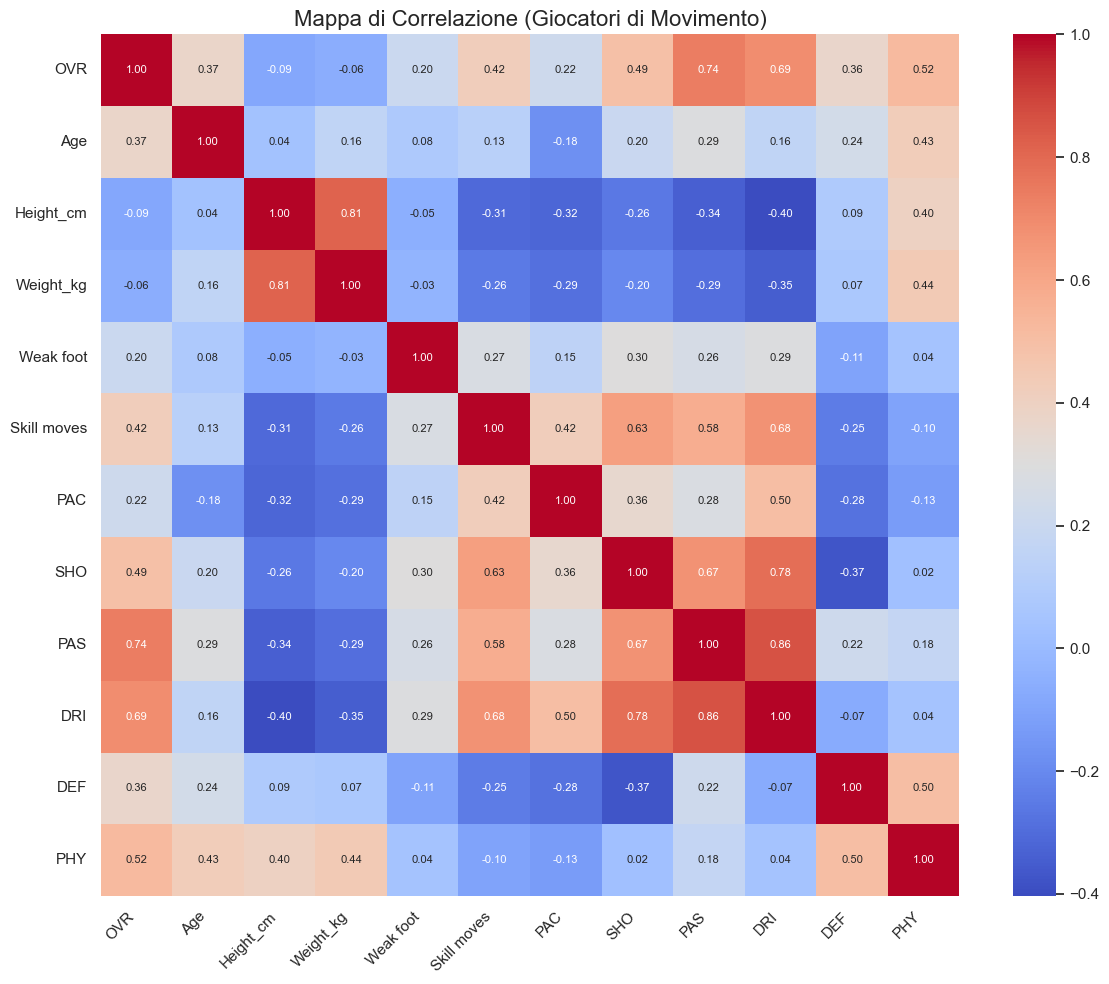

In [10]:
# --- CELLA 7 (Nuova): Mappa di Correlazione (SOLO Giocatori di Movimento) ---

print("--- 2.6 Mappa di Correlazione (Giocatori di Movimento) ---")
print("Filtraggio per Position != 'GK'...")

# 1. Creiamo un DataFrame solo con i giocatori di movimento
df_outfield = df_cleaned[df_cleaned['Position'] != 'GK'].copy()
print(f"Analisi su {len(df_outfield)} giocatori di movimento.")

# 2. Selezioniamo le colonne da correlare
numerical_cols = [
    'OVR', 'Age', 'Height_cm', 'Weight_kg', 'Weak foot', 'Skill moves',
    'Stat1_PAC_GK-DIV', 'Stat2_SHO_GK-HAN', 'Stat3_PAS_GK-KIC',
    'Stat4_DRI_GK-REF', 'Stat5_DEF_GK-SPD', 'Stat6_PHY_GK-POS'
]

# 3. Calcoliamo la matrice di correlazione
corr_matrix_outfield = df_outfield[numerical_cols].corr()

# 4. RINOMINIAMO le colonne per la visualizzazione
# Ora 'Stat1...' significa solo 'PAC', 'Stat2...' solo 'SHO', ecc.
rename_map_corr = {
    'Stat1_PAC_GK-DIV': 'PAC',
    'Stat2_SHO_GK-HAN': 'SHO',
    'Stat3_PAS_GK-KIC': 'PAS',
    'Stat4_DRI_GK-REF': 'DRI',
    'Stat5_DEF_GK-SPD': 'DEF',
    'Stat6_PHY_GK-POS': 'PHY'
}
corr_matrix_outfield = corr_matrix_outfield.rename(columns=rename_map_corr, index=rename_map_corr)

# 5. Creiamo il grafico (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix_outfield, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"size": 8}
)
plt.title('Mappa di Correlazione (Giocatori di Movimento)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### MAPPA CORRELAZIONE VELCOCITA'

--- Correlazione: PAC (Giocatori di Movimento) ---


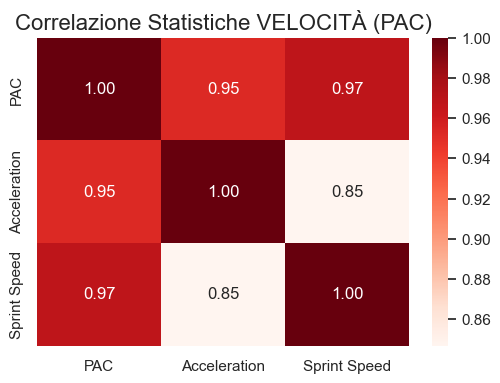

In [11]:
# --- CELLA 9: Correlazione VELOCITÀ (PAC) e Sottostatistiche ---

print("--- Correlazione: PAC (Giocatori di Movimento) ---")

# Definiamo le colonne (la statistica 'padre' e le sue 'figlie')
pac_cols = [
    'Stat1_PAC_GK-DIV', # -> PAC
    'Acceleration', 
    'Sprint Speed'
]

# Calcoliamo la correlazione
corr_pac = df_outfield[pac_cols].corr()

# Rinominiamo per leggibilità
corr_pac = corr_pac.rename(
    columns={'Stat1_PAC_GK-DIV': 'PAC'}, 
    index={'Stat1_PAC_GK-DIV': 'PAC'}
)

# Creiamo la heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_pac, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlazione Statistiche VELOCITÀ (PAC)', fontsize=16)
plt.show()

### MAPPA CORRELAZIONE TIRO

--- Correlazione: SHO (Giocatori di Movimento) ---


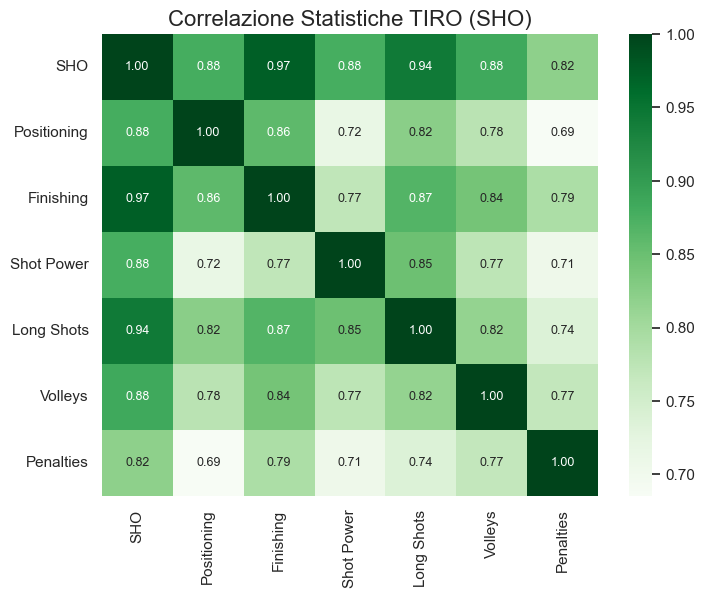

In [12]:
# --- CELLA 10: Correlazione TIRO (SHO) e Sottostatistiche ---

print("--- Correlazione: SHO (Giocatori di Movimento) ---")

sho_cols = [
    'Stat2_SHO_GK-HAN', # -> SHO
    'Positioning', 
    'Finishing', 
    'Shot Power', 
    'Long Shots', 
    'Volleys', 
    'Penalties'
]

corr_sho = df_outfield[sho_cols].corr()
corr_sho = corr_sho.rename(
    columns={'Stat2_SHO_GK-HAN': 'SHO'}, 
    index={'Stat2_SHO_GK-HAN': 'SHO'}
)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_sho, annot=True, cmap='Greens', fmt='.2f', annot_kws={"size": 9})
plt.title('Correlazione Statistiche TIRO (SHO)', fontsize=16)
plt.show()

### MAPPA CORRELAZIONE PASSAGGIO

--- Correlazione: PAS (Giocatori di Movimento) ---


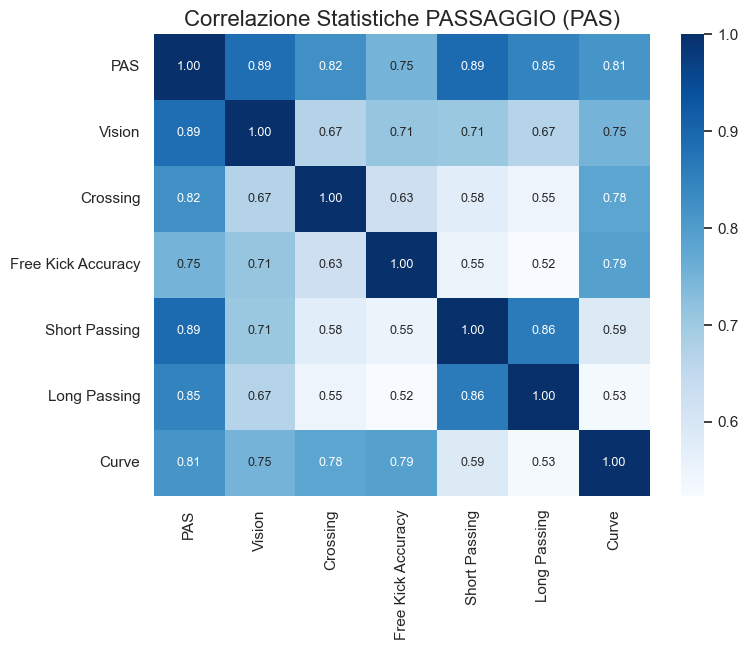

In [13]:
# --- CELLA 11: Correlazione PASSAGGIO (PAS) e Sottostatistiche ---

print("--- Correlazione: PAS (Giocatori di Movimento) ---")

pas_cols = [
    'Stat3_PAS_GK-KIC', # -> PAS
    'Vision', 
    'Crossing', 
    'Free Kick Accuracy', 
    'Short Passing', 
    'Long Passing', 
    'Curve'
]

corr_pas = df_outfield[pas_cols].corr()
corr_pas = corr_pas.rename(
    columns={'Stat3_PAS_GK-KIC': 'PAS'}, 
    index={'Stat3_PAS_GK-KIC': 'PAS'}
)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_pas, annot=True, cmap='Blues', fmt='.2f', annot_kws={"size": 9})
plt.title('Correlazione Statistiche PASSAGGIO (PAS)', fontsize=16)
plt.show()

### MAPPA CORRELAZIONE DRIBBLING

--- Correlazione: DRI (Giocatori di Movimento) ---


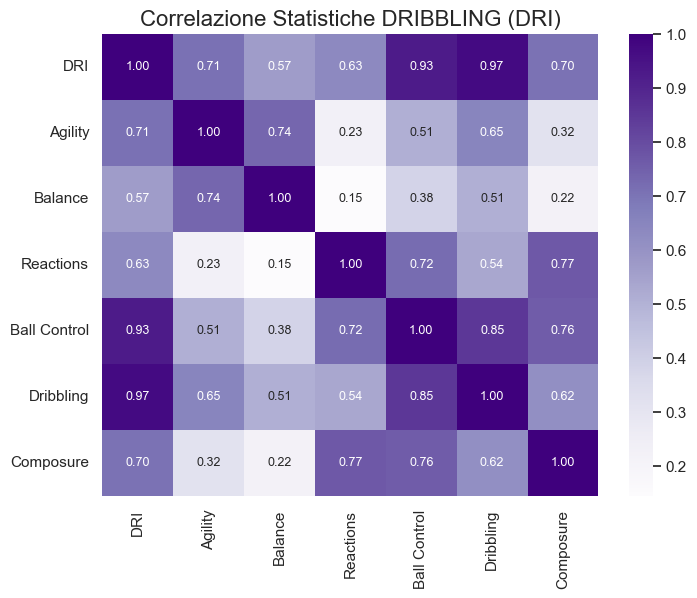

In [14]:
# --- CELLA 12: Correlazione DRIBBLING (DRI) e Sottostatistiche ---

print("--- Correlazione: DRI (Giocatori di Movimento) ---")

dri_cols = [
    'Stat4_DRI_GK-REF', # -> DRI
    'Agility', 
    'Balance', 
    'Reactions', 
    'Ball Control', 
    'Dribbling', 
    'Composure'
]

corr_dri = df_outfield[dri_cols].corr()
corr_dri = corr_dri.rename(
    columns={'Stat4_DRI_GK-REF': 'DRI'}, 
    index={'Stat4_DRI_GK-REF': 'DRI'}
)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_dri, annot=True, cmap='Purples', fmt='.2f', annot_kws={"size": 9})
plt.title('Correlazione Statistiche DRIBBLING (DRI)', fontsize=16)
plt.show()

### MAPPA CORRELAZIONE DIFERSA

--- Correlazione: DEF (Giocatori di Movimento) ---


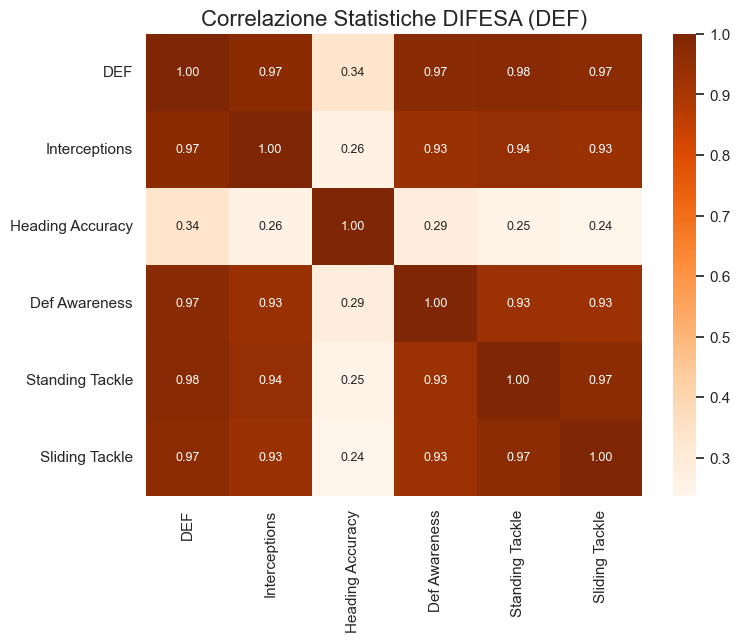

In [15]:
# --- CELLA 13: Correlazione DIFESA (DEF) e Sottostatistiche ---

print("--- Correlazione: DEF (Giocatori di Movimento) ---")

def_cols = [
    'Stat5_DEF_GK-SPD', # -> DEF
    'Interceptions', 
    'Heading Accuracy', 
    'Def Awareness', 
    'Standing Tackle', 
    'Sliding Tackle'
]

corr_def = df_outfield[def_cols].corr()
corr_def = corr_def.rename(
    columns={'Stat5_DEF_GK-SPD': 'DEF'}, 
    index={'Stat5_DEF_GK-SPD': 'DEF'}
)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_def, annot=True, cmap='Oranges', fmt='.2f', annot_kws={"size": 9})
plt.title('Correlazione Statistiche DIFESA (DEF)', fontsize=16)
plt.show()

### MAPPA CORRELAZIONE FISICO

--- Correlazione: PHY (Giocatori di Movimento) ---


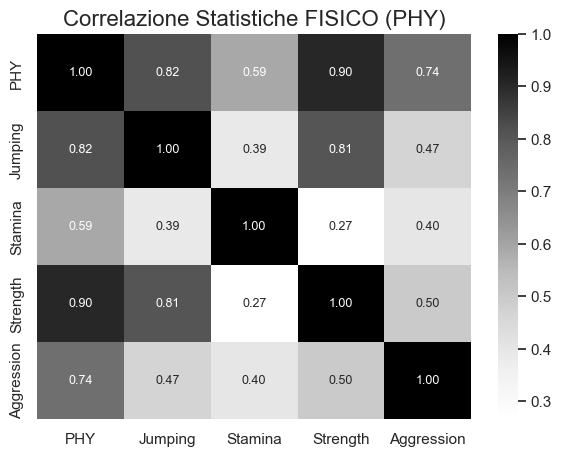

In [16]:
# --- CELLA 14: Correlazione FISICO (PHY) e Sottostatistiche ---

print("--- Correlazione: PHY (Giocatori di Movimento) ---")

phy_cols = [
    'Stat6_PHY_GK-POS', # -> PHY
    'Jumping', 
    'Stamina', 
    'Strength', 
    'Aggression'
]

corr_phy = df_outfield[phy_cols].corr()
corr_phy = corr_phy.rename(
    columns={'Stat6_PHY_GK-POS': 'PHY'}, 
    index={'Stat6_PHY_GK-POS': 'PHY'}
)

plt.figure(figsize=(7, 5))
sns.heatmap(corr_phy, annot=True, cmap='Greys', fmt='.2f', annot_kws={"size": 9})
plt.title('Correlazione Statistiche FISICO (PHY)', fontsize=16)
plt.show()

### MAPPA CORRELAZIONE RIASSUNTIVA PEARSON

--- 2.8 Mappa di Correlazione Riassuntiva (Giocatori di Movimento) ---


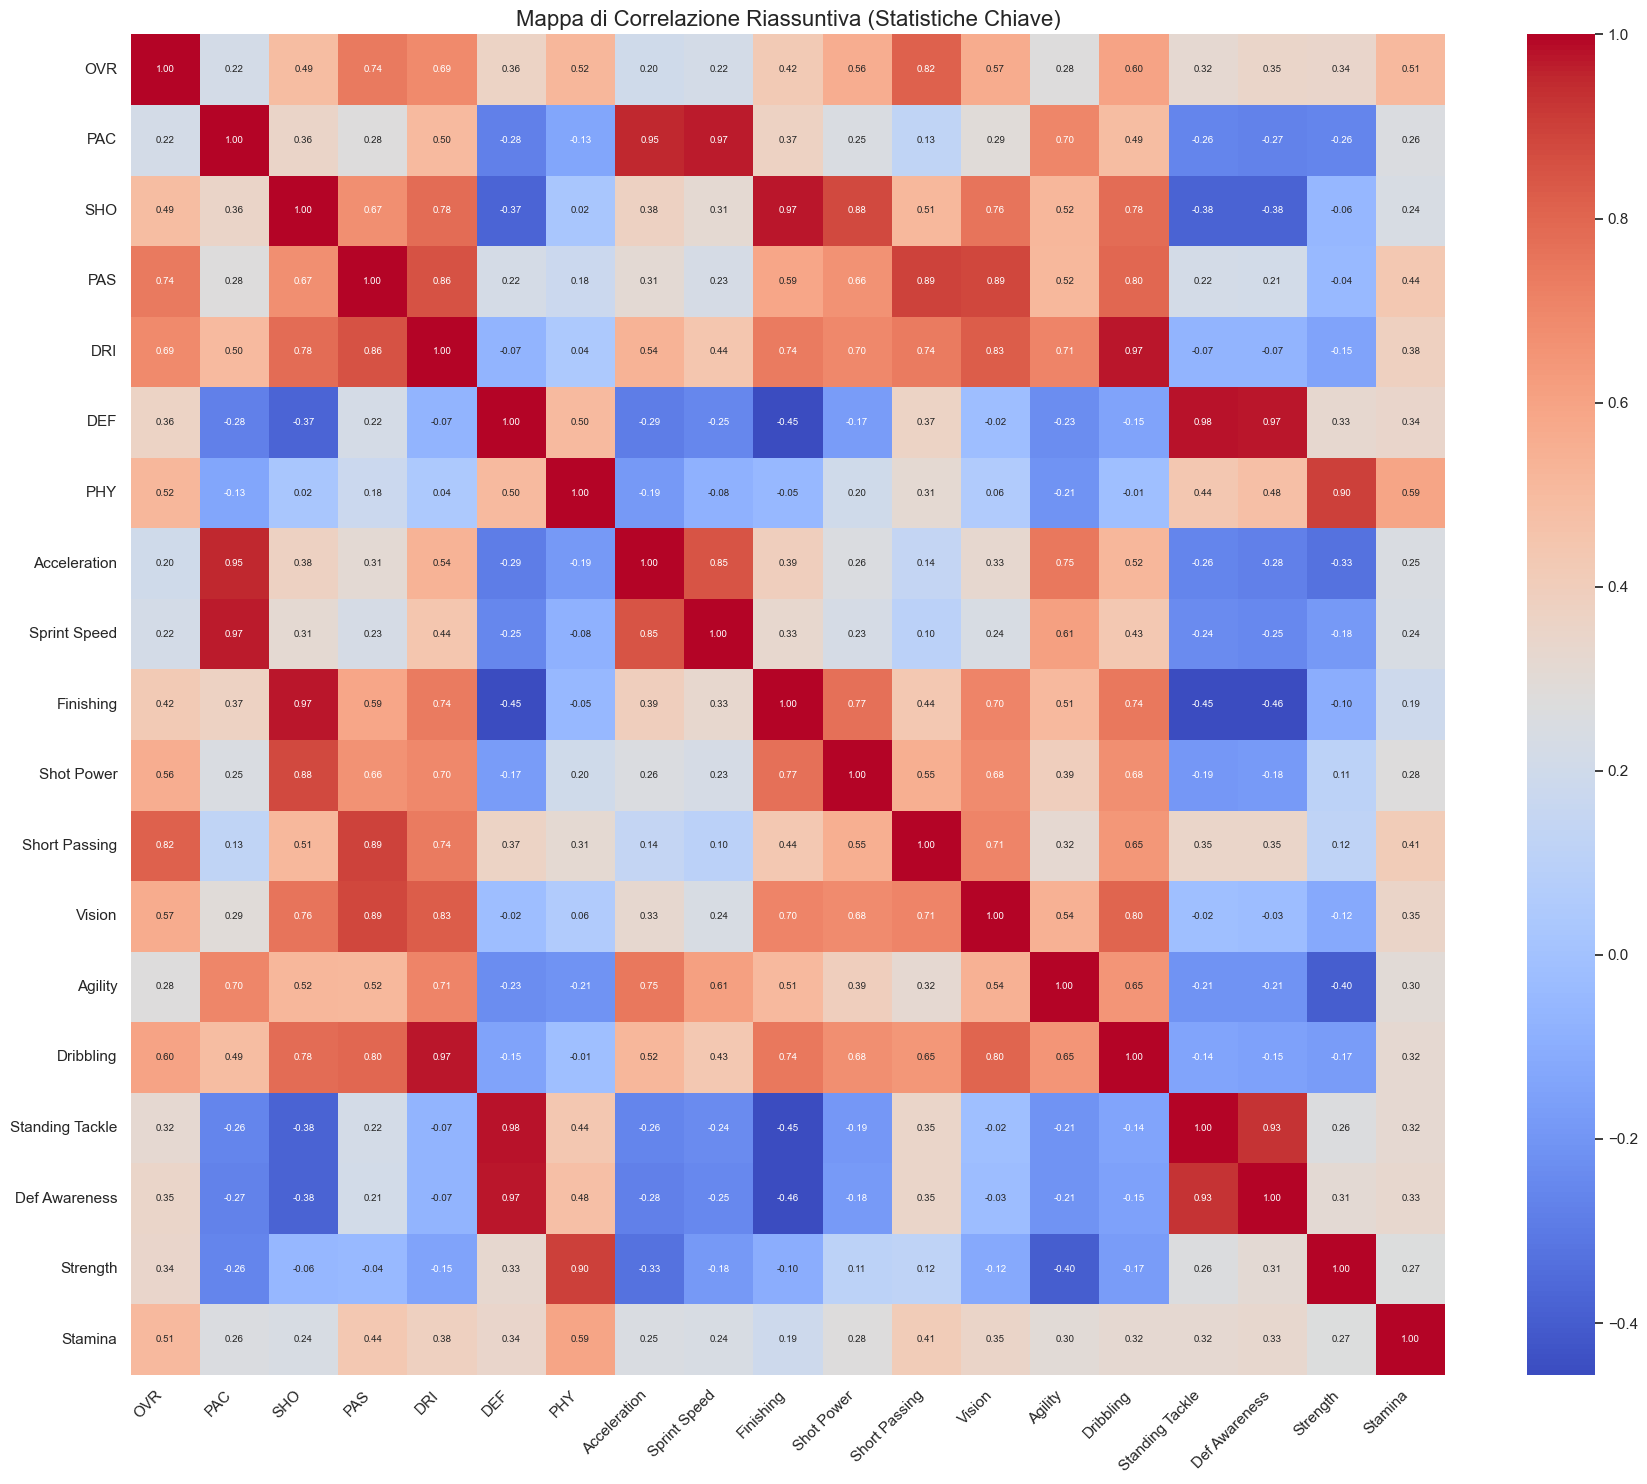

In [17]:
# --- CELLA 15: Mappa di Correlazione "Riassuntiva" (Statistiche Chiave) ---

print("--- 2.8 Mappa di Correlazione Riassuntiva (Giocatori di Movimento) ---")

# 1. Selezioniamo le 19 colonne (OVR + 6 Main + 12 Sub-Stats)
summary_cols = [
    'OVR',
    # Le 6 "Padri"
    'Stat1_PAC_GK-DIV', 'Stat2_SHO_GK-HAN', 'Stat3_PAS_GK-KIC',
    'Stat4_DRI_GK-REF', 'Stat5_DEF_GK-SPD', 'Stat6_PHY_GK-POS',
    
    # Le 12 "Figlie" (due per ogni padre)
    'Acceleration', 'Sprint Speed',   # per PAC
    'Finishing', 'Shot Power',         # per SHO
    'Short Passing', 'Vision',         # per PAS
    'Agility', 'Dribbling',            # per DRI
    'Standing Tackle', 'Def Awareness',# per DEF
    'Strength', 'Stamina'              # per PHY
]

# 2. Calcoliamo la correlazione
corr_summary = df_outfield[summary_cols].corr()

# 3. Rinominiamo le 6 statistiche "Padri" per leggibilità
rename_map_summary = {
    'Stat1_PAC_GK-DIV': 'PAC',
    'Stat2_SHO_GK-HAN': 'SHO',
    'Stat3_PAS_GK-KIC': 'PAS',
    'Stat4_DRI_GK-REF': 'DRI',
    'Stat5_DEF_GK-SPD': 'DEF',
    'Stat6_PHY_GK-POS': 'PHY'
}
corr_summary = corr_summary.rename(columns=rename_map_summary, index=rename_map_summary)

# 4. Creiamo la heatmap (grande e con testo piccolo)
plt.figure(figsize=(18, 15))
sns.heatmap(
    corr_summary,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 7} # Testo molto piccolo per farlo stare
)
plt.title('Mappa di Correlazione Riassuntiva (Statistiche Chiave)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### CORRELAZIONE SPEARMAN

--- 2.8 Mappa di Correlazione Riassuntiva (Giocatori di Movimento) ---


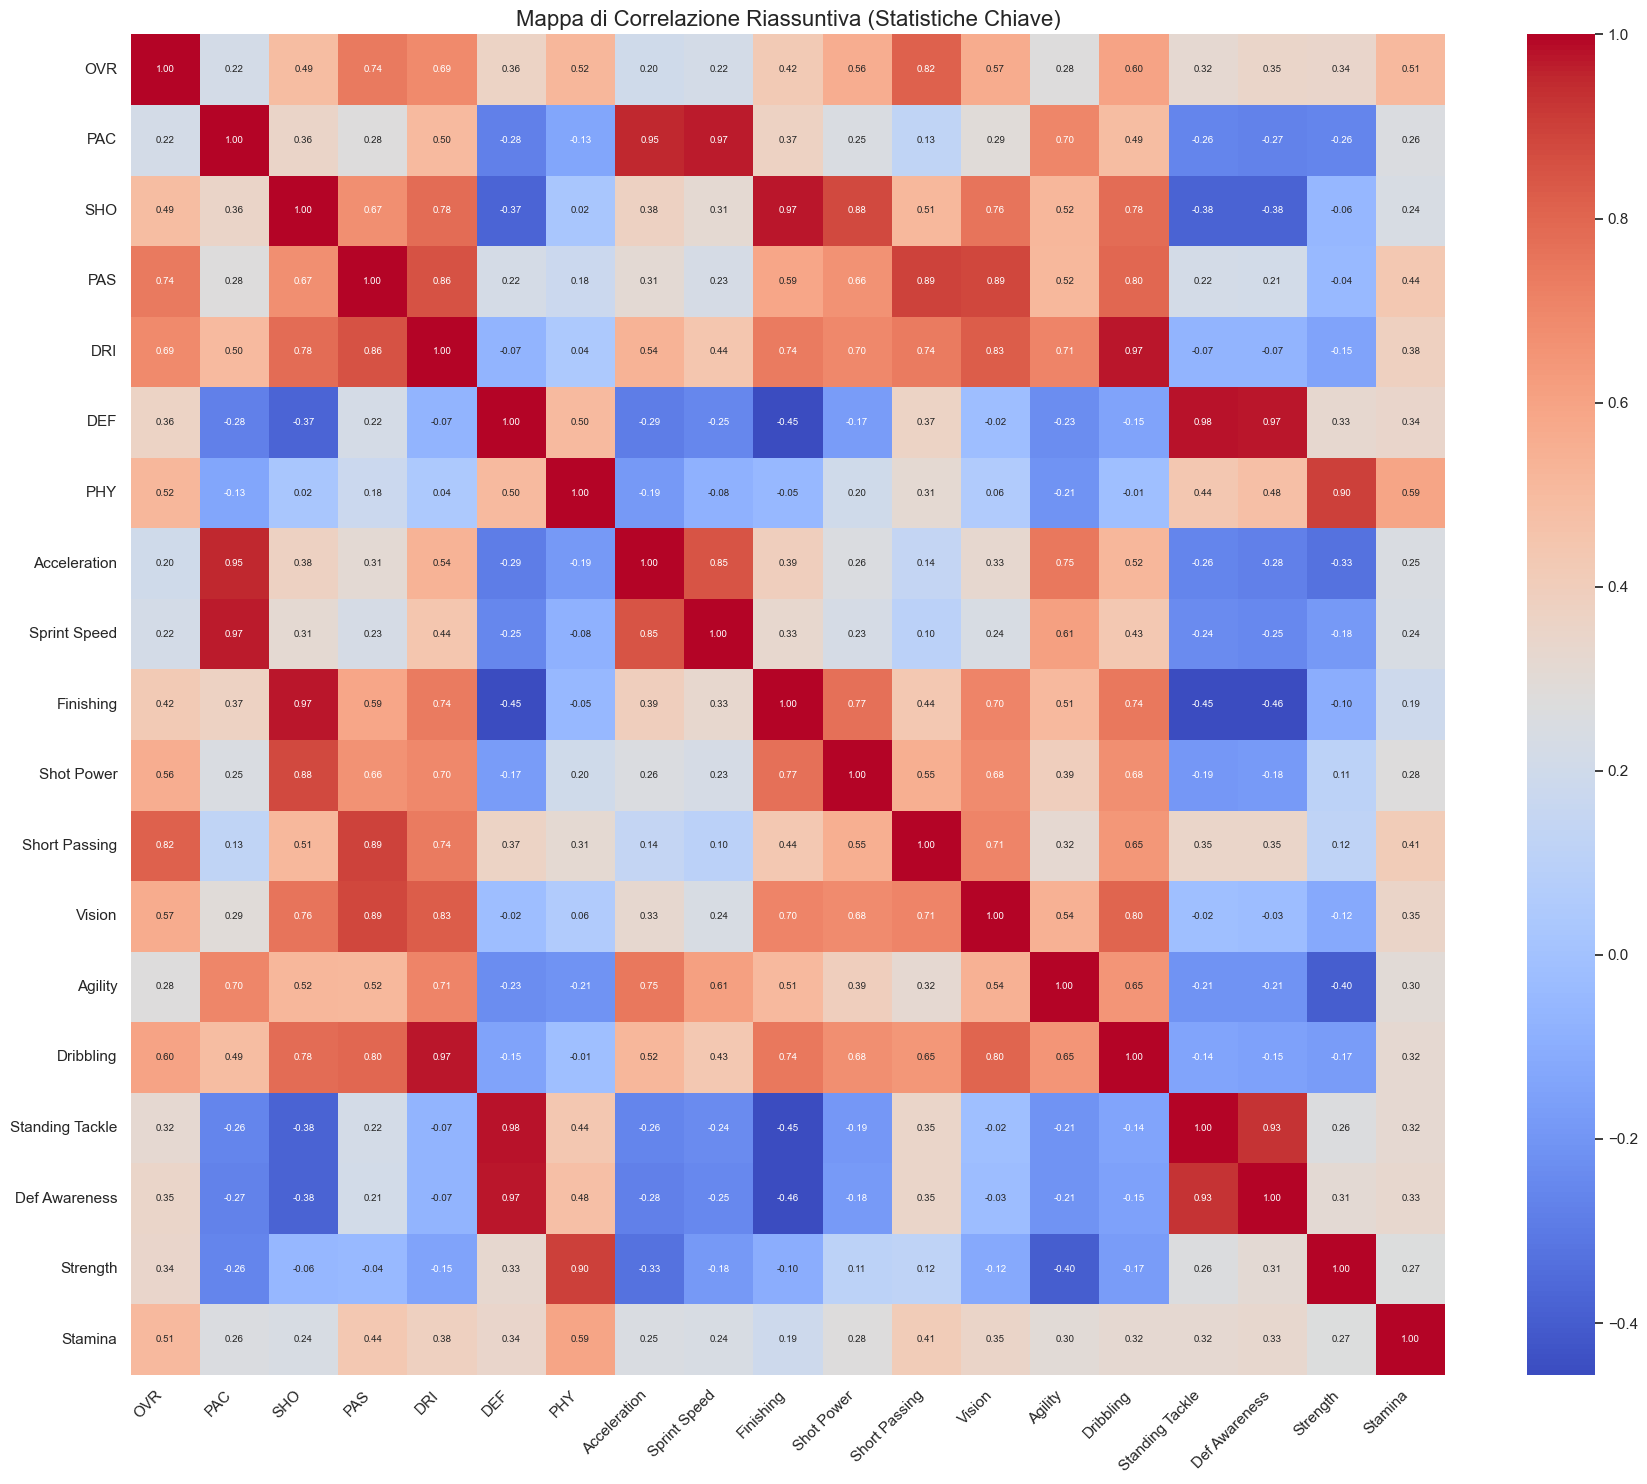

In [27]:
# --- CELLA 15: Mappa di Correlazione "Riassuntiva" (Statistiche Chiave) ---

print("--- 2.8 Mappa di Correlazione Riassuntiva (Giocatori di Movimento) ---")

# 1. Selezioniamo le 19 colonne (OVR + 6 Main + 12 Sub-Stats)
summary_cols = [
    'OVR',
    # Le 6 "Padri"
    'Stat1_PAC_GK-DIV', 'Stat2_SHO_GK-HAN', 'Stat3_PAS_GK-KIC',
    'Stat4_DRI_GK-REF', 'Stat5_DEF_GK-SPD', 'Stat6_PHY_GK-POS',
    
    # Le 12 "Figlie" (due per ogni padre)
    'Acceleration', 'Sprint Speed',   # per PAC
    'Finishing', 'Shot Power',         # per SHO
    'Short Passing', 'Vision',         # per PAS
    'Agility', 'Dribbling',            # per DRI
    'Standing Tackle', 'Def Awareness',# per DEF
    'Strength', 'Stamina'              # per PHY
]

# 2. Calcoliamo la correlazione
corr_matrix_outfield = df_outfield[numerical_cols].corr(method='spearman')

# 3. Rinominiamo le 6 statistiche "Padri" per leggibilità
rename_map_summary = {
    'Stat1_PAC_GK-DIV': 'PAC',
    'Stat2_SHO_GK-HAN': 'SHO',
    'Stat3_PAS_GK-KIC': 'PAS',
    'Stat4_DRI_GK-REF': 'DRI',
    'Stat5_DEF_GK-SPD': 'DEF',
    'Stat6_PHY_GK-POS': 'PHY'
}
corr_summary = corr_summary.rename(columns=rename_map_summary, index=rename_map_summary)

# 4. Creiamo la heatmap (grande e con testo piccolo)
plt.figure(figsize=(18, 15))
sns.heatmap(
    corr_summary,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 7} # Testo molto piccolo per farlo stare
)
plt.title('Mappa di Correlazione Riassuntiva (Statistiche Chiave)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

--- Distribuzione Giocatori per Nazione (Top 30) ---


/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_18705/596766581.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


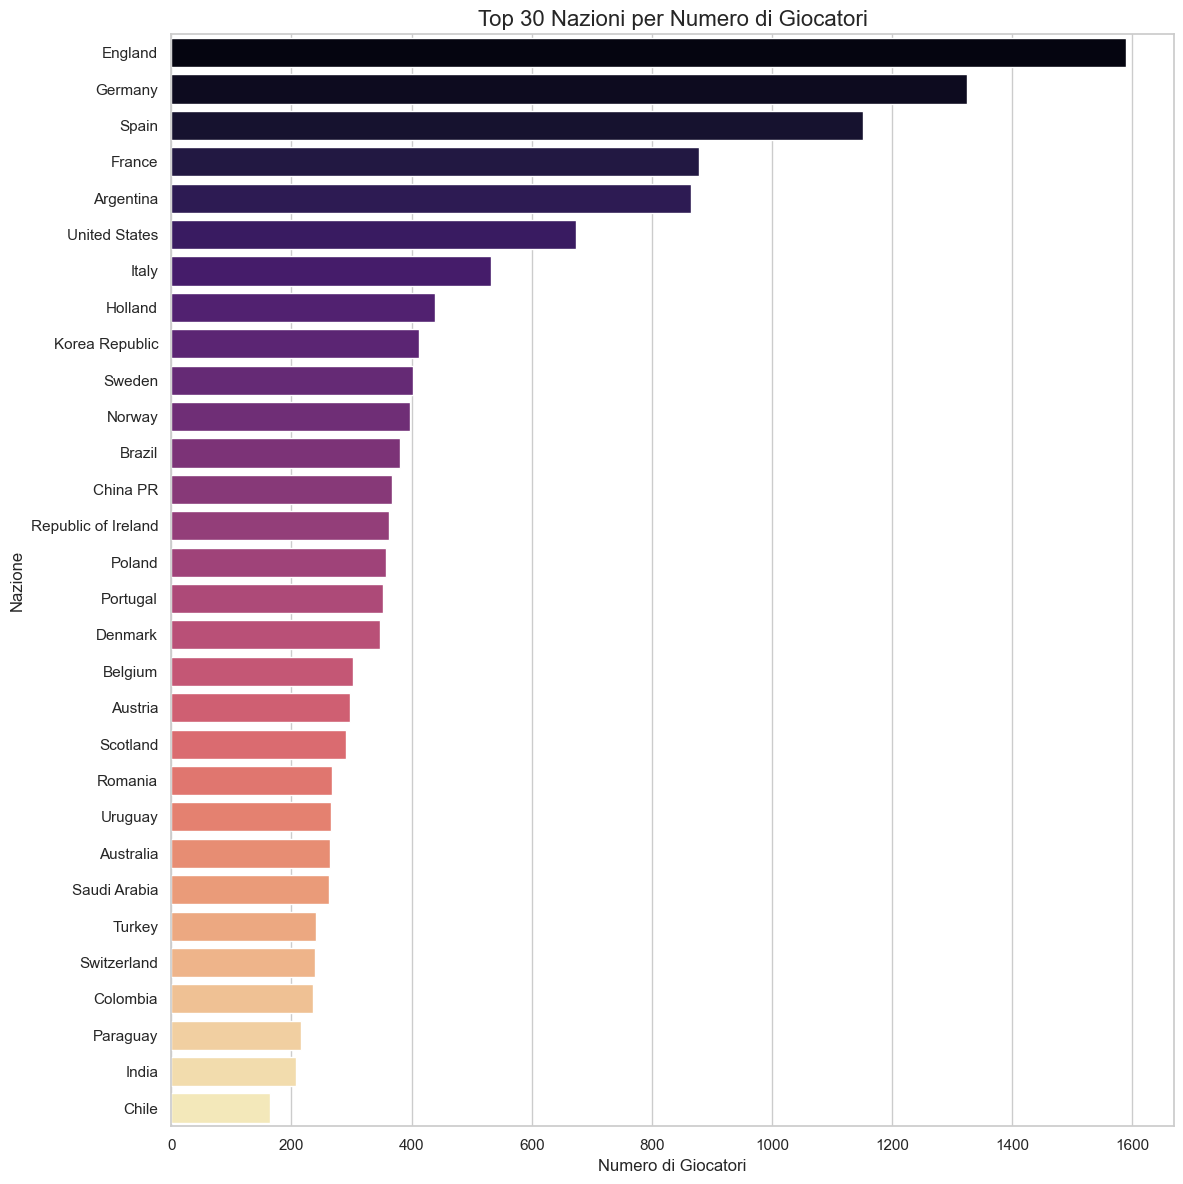

In [18]:
# --- CELLA 16: Visualizzazione - Distribuzione Nazioni (Top 30) ---

print("--- Distribuzione Giocatori per Nazione (Top 30) ---")

# 1. Calcoliamo i conteggi per le prime 30 nazioni
nation_counts_top30 = df_cleaned['Nation'].value_counts().head(30)

# 2. Creiamo il grafico a barre orizzontale
plt.figure(figsize=(12, 12)) # Grafico più alto per contenere 30 etichette
sns.barplot(
    x=nation_counts_top30.values, 
    y=nation_counts_top30.index,
    palette='magma' # Un'altra palette di colori
)
plt.title('Top 30 Nazioni per Numero di Giocatori', fontsize=16)
plt.xlabel('Numero di Giocatori', fontsize=12)
plt.ylabel('Nazione', fontsize=12)
plt.tight_layout()
plt.show()

--- Distribuzione Giocatori per Campionato (Top 30) ---


/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_18705/1883217574.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


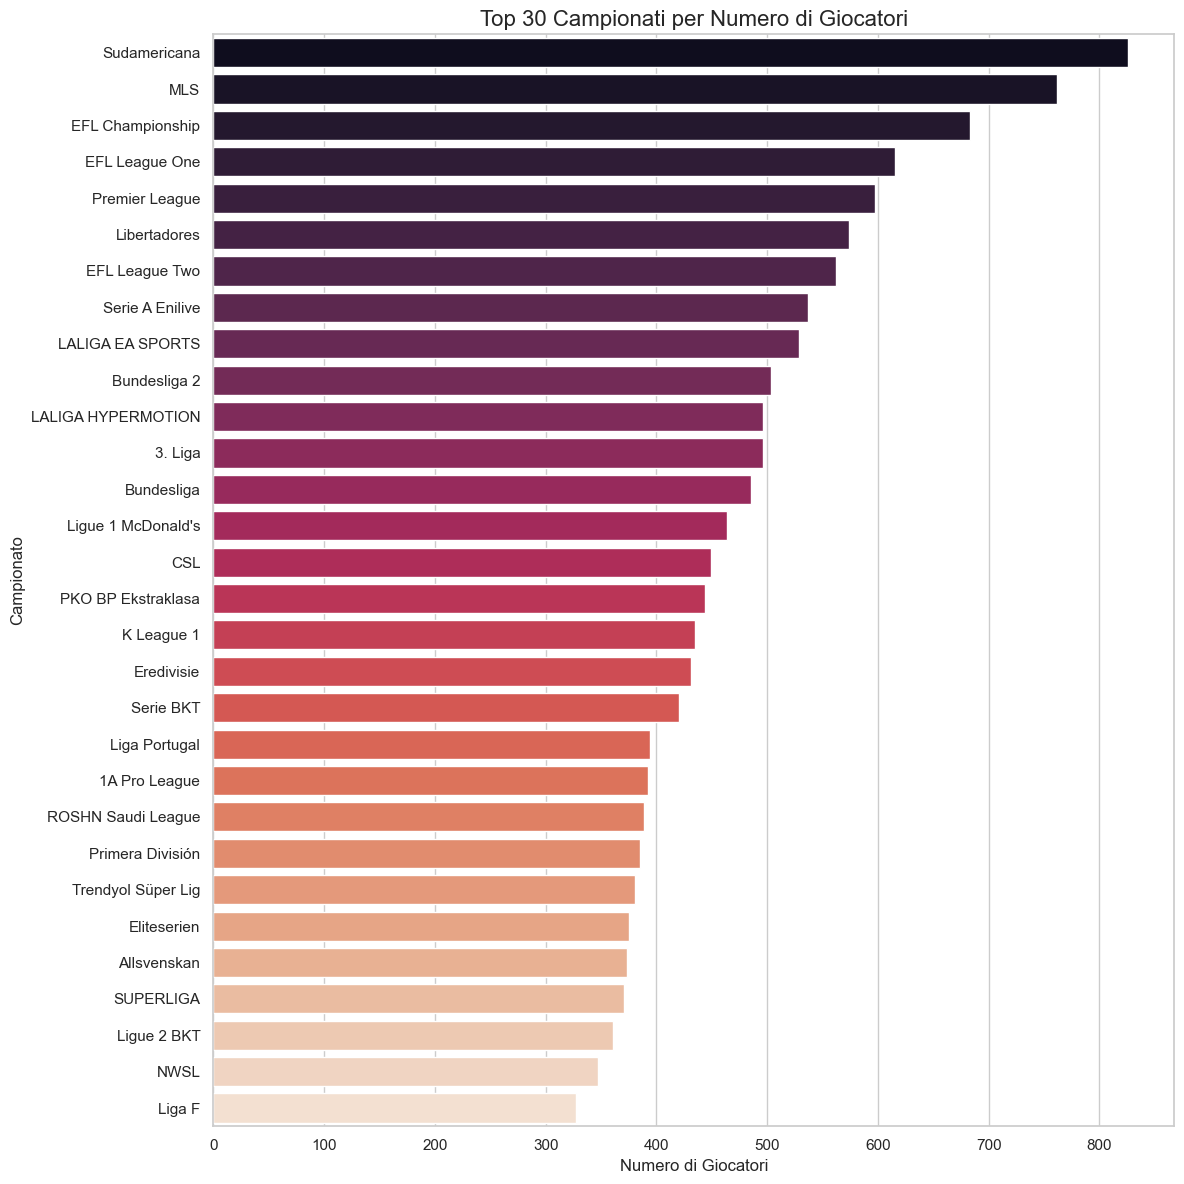

In [19]:
# --- CELLA 17: Visualizzazione - Distribuzione Campionati (Top 30) ---

print("--- Distribuzione Giocatori per Campionato (Top 30) ---")

# 1. Calcoliamo i conteggi per i primi 30 campionati
league_counts_top30 = df_cleaned['League'].value_counts().head(30)

# 2. Creiamo il grafico a barre orizzontale
plt.figure(figsize=(12, 12)) # Grafico più alto per contenere 30 etichette
sns.barplot(
    x=league_counts_top30.values, 
    y=league_counts_top30.index,
    palette='rocket' # Un'altra palette di colori
)
plt.title('Top 30 Campionati per Numero di Giocatori', fontsize=16)
plt.xlabel('Numero di Giocatori', fontsize=12)
plt.ylabel('Campionato', fontsize=12)
plt.tight_layout()
plt.show()

In [20]:
# --- CELLA 18: Visualizzazione - Tabella Top 20 Giocatori per OVR ---

print("--- Top 20 Giocatori per OVR (Tabella) ---")

# Selezioniamo le colonne che vogliamo mostrare
colonne_da_mostrare = ['Name', 'OVR', 'Position', 'Team', 'Nation', 'League']

# Usiamo .nlargest() che è un modo efficiente per prendere i top N
df_top_players_table = df_cleaned[colonne_da_mostrare].nlargest(20, 'OVR')

# display() crea una tabella HTML pulita nel notebook
display(df_top_players_table)

--- Top 20 Giocatori per OVR (Tabella) ---


,Name,OVR,Position,Team,Nation,League
0,Kylian Mbappé,91,ST,Real Madrid,France,LALIGA EA SPORTS
1,Rodri,91,CDM,Manchester City,Spain,Premier League
2,Erling Haaland,91,ST,Manchester City,Norway,Premier League
16161,Aitana Bonmatí,91,CM,FC Barcelona,Spain,Liga F
3,Jude Bellingham,90,CAM,Real Madrid,England,LALIGA EA SPORTS
4,Vini Jr.,90,LW,Real Madrid,Brazil,LALIGA EA SPORTS
5,Kevin De Bruyne,90,CM,Manchester City,Belgium,Premier League
6,Harry Kane,90,ST,FC Bayern München,England,Bundesliga
16162,Alexia Putellas,90,CM,FC Barcelona,Spain,Liga F
16163,Caroline Graham Hansen,90,RW,FC Barcelona,Norway,Liga F


--- Top 20 Giocatori per OVR (Grafico) ---


/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_18705/996650317.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


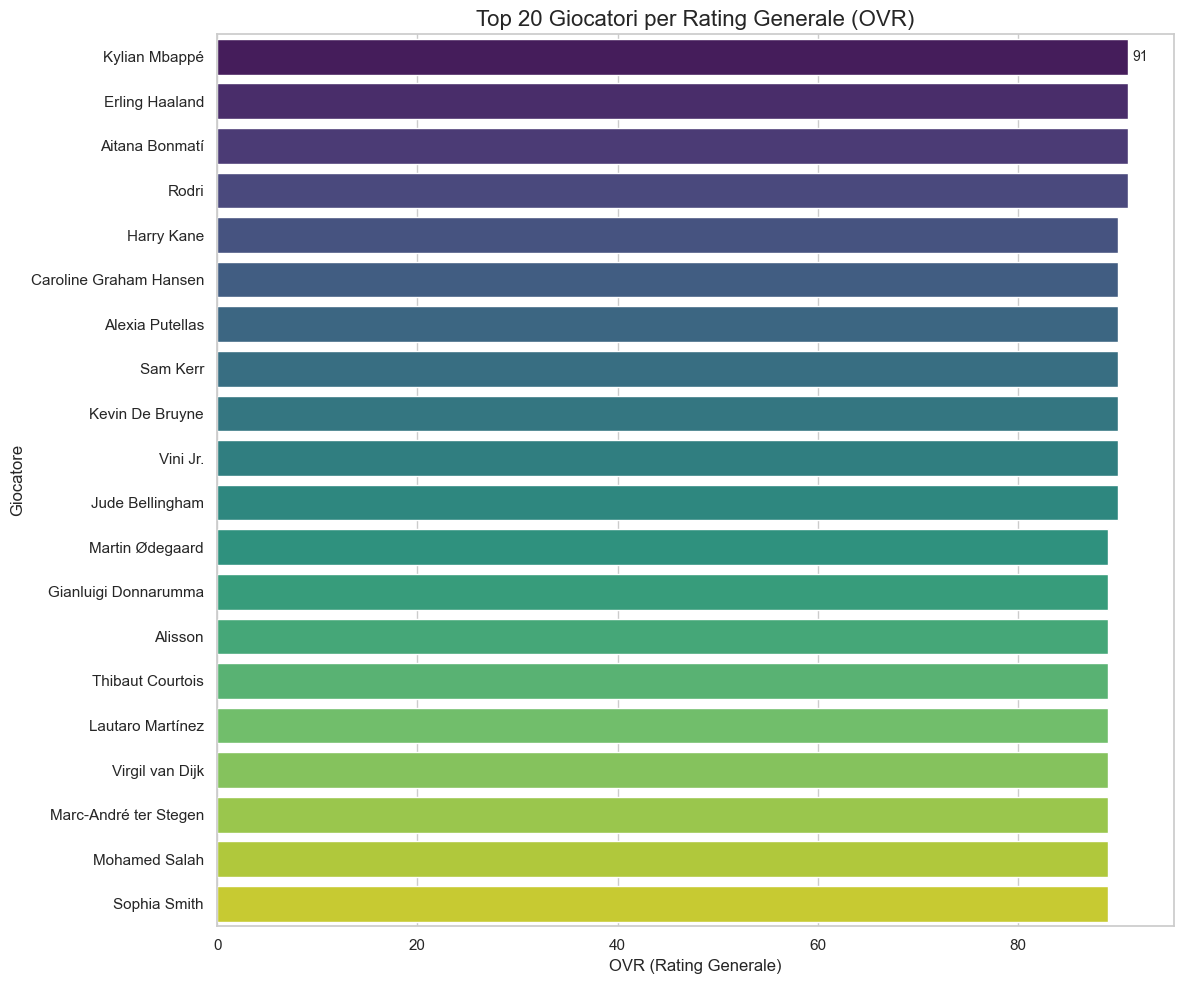

In [21]:
# --- CELLA 19: Visualizzazione - Grafico Top 20 Giocatori per OVR ---

print("--- Top 20 Giocatori per OVR (Grafico) ---")

# 1. Prendiamo i primi 20 giocatori (serve per il grafico)
# Usiamo nlargest() per ottenere i migliori, poi sort_values()
# per assicurarci che nel grafico appaiano in ordine (opzionale ma carino)
df_top_players_chart = df_cleaned.nlargest(20, 'OVR').sort_values(by='OVR', ascending=False)

# 2. Creiamo il grafico
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    x='OVR', 
    y='Name', 
    data=df_top_players_chart,
    palette='viridis'
)

plt.title('Top 20 Giocatori per Rating Generale (OVR)', fontsize=16)
plt.xlabel('OVR (Rating Generale)', fontsize=12)
plt.ylabel('Giocatore', fontsize=12)

# Aggiungiamo i valori OVR esatti su ogni barra (molto 'carino')
ax.bar_label(ax.containers[0], fmt='%d', padding=3, fontsize=10)

plt.tight_layout()
plt.show()

### OVR MEDIO PER ETA'

--- Calcolo OVR medio per Età ---


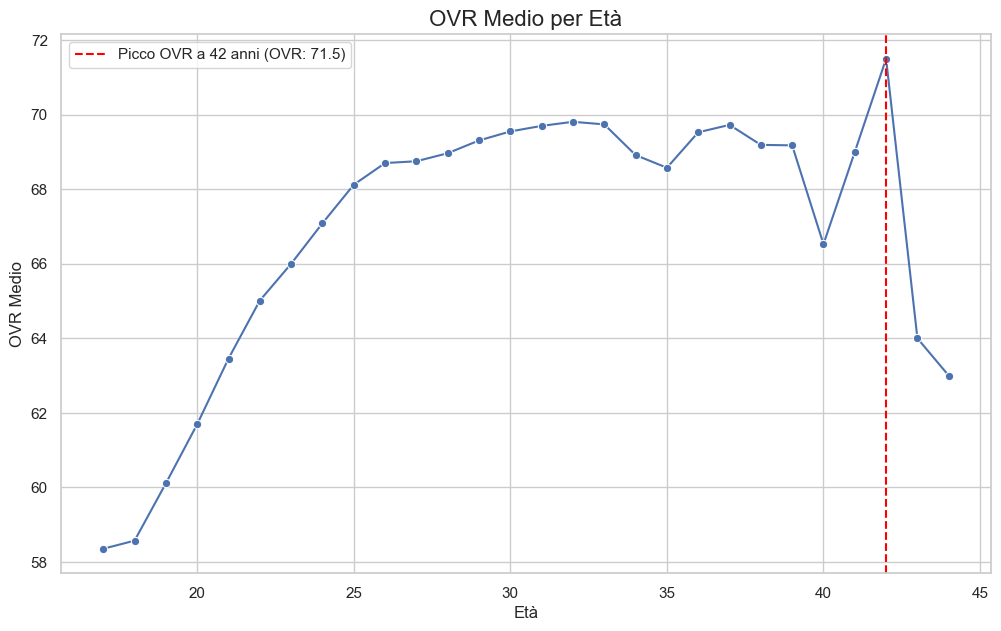

L'età media di picco per l'OVR è: 42 anni.


In [22]:
# --- CELLA 20: Analisi OVR medio per Età (Curva di Picco) ---

print("--- Calcolo OVR medio per Età ---")

# 1. Raggruppiamo per 'Age' e calcoliamo la media di 'OVR'
avg_ovr_by_age = df_cleaned.groupby('Age')['OVR'].mean().reset_index()

# 2. Creiamo un grafico a linee per vedere il trend
plt.figure(figsize=(12, 7))
sns.lineplot(
    x='Age',
    y='OVR',
    data=avg_ovr_by_age,
    marker='o' # Aggiungiamo un pallino per ogni età
)

# Troviamo l'età di picco
peak_age = avg_ovr_by_age.loc[avg_ovr_by_age['OVR'].idxmax()]
plt.axvline(x=peak_age['Age'], color='red', linestyle='--', label=f"Picco OVR a {int(peak_age['Age'])} anni (OVR: {peak_age['OVR']:.1f})")

plt.title('OVR Medio per Età', fontsize=16)
plt.xlabel('Età', fontsize=12)
plt.ylabel('OVR Medio', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print(f"L'età media di picco per l'OVR è: {int(peak_age['Age'])} anni.")

### WONDERKIDS

In [23]:
# --- CELLA 21: Visualizzazione - Top 15 "Prospetti" (<= 21 anni) ---

print("--- Top 15 'Prospetti' (Età <= 21) per OVR ---")

# 1. Filtriamo per età
df_prospects = df_cleaned[df_cleaned['Age'] <= 21].copy()

# 2. Selezioniamo le colonne
colonne_prospetti = ['Name', 'OVR', 'Age', 'Position', 'Team', 'League']

# 3. Usiamo .nlargest() per prendere i top 15
df_top_prospects_table = df_prospects[colonne_prospetti].nlargest(15, 'OVR')

# 4. Mostriamo la tabella
display(df_top_prospects_table)

--- Top 15 'Prospetti' (Età <= 21) per OVR ---


,Name,OVR,Age,Position,Team,League
3,Jude Bellingham,90,21,CAM,Real Madrid,LALIGA EA SPORTS
25,Florian Wirtz,88,21,CAM,Leverkusen,Bundesliga
29,Jamal Musiala,87,21,CAM,FC Bayern München,Bundesliga
57,Pedri,86,21,CM,FC Barcelona,LALIGA EA SPORTS
135,Eduardo Camavinga,83,21,CM,Real Madrid,LALIGA EA SPORTS
167,Gavi,83,20,CM,FC Barcelona,LALIGA EA SPORTS
180,Xavi Simons,83,21,CAM,RB Leipzig,Bundesliga
16260,Melchie Dumornay,83,21,ST,OL,Arkema PL
253,Savinho,82,20,LW,Manchester City,Premier League
274,Destiny Udogie,82,21,LB,Spurs,Premier League


### DISTRIBUZIONE SKILL/WEAK FOOT

--- Conteggio Giocatori per Skill Moves e Weak Foot (solo Giocatori di Movimento) ---


/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_18705/628210425.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_18705/628210425.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


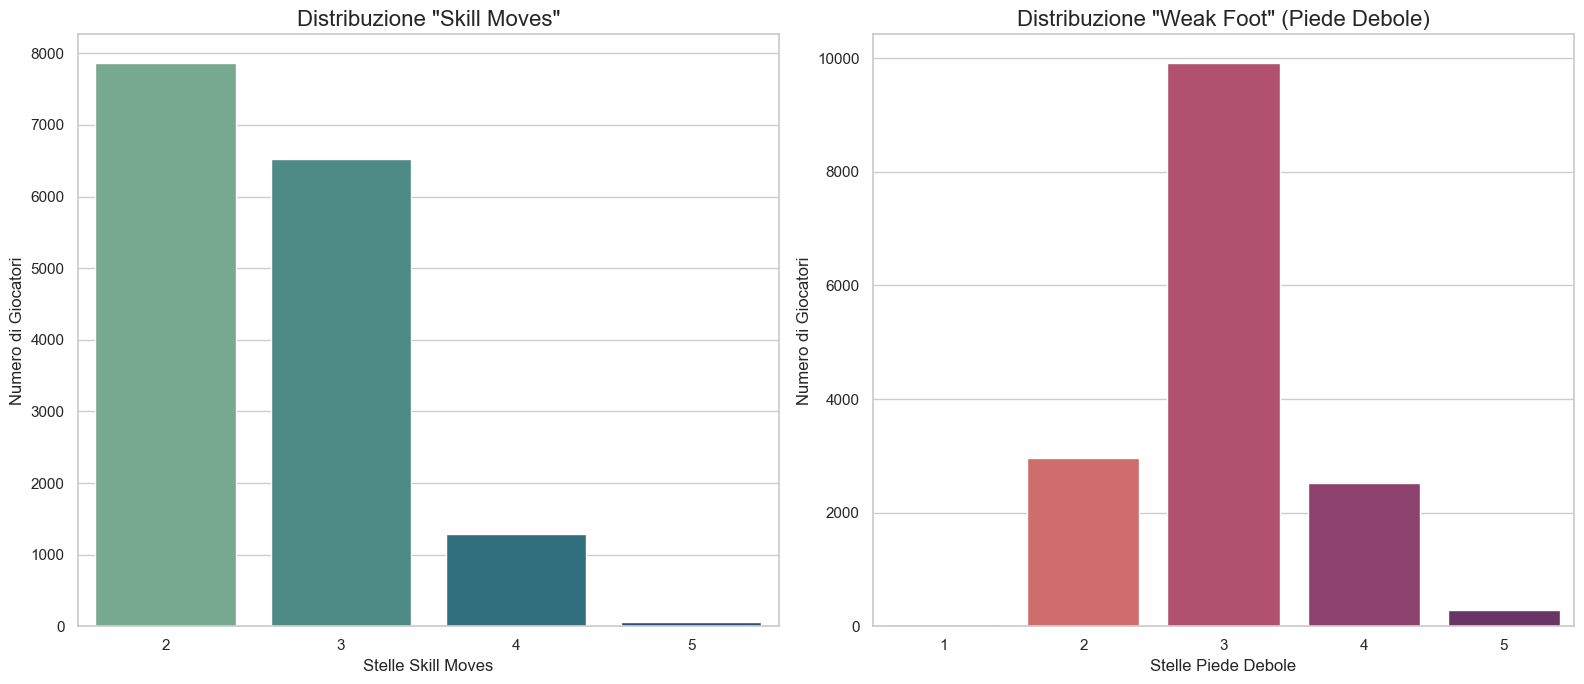

In [24]:
# --- CELLA 22: Distribuzione Skill Moves e Weak Foot ---

print("--- Conteggio Giocatori per Skill Moves e Weak Foot (solo Giocatori di Movimento) ---")

# Usiamo df_outfield (creato nella Cella 7) perché Skill/Weak Foot 
# non sono molto rilevanti per i Portieri (GK)
# Se non hai eseguito la Cella 7, decommenta la riga qui sotto:
# df_outfield = df_cleaned[df_cleaned['Position'] != 'GK'].copy()


# Creiamo 2 grafici affiancati (1 riga, 2 colonne)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Grafico 1: Skill Moves
sns.countplot(
    ax=axes[0],
    data=df_outfield, 
    x='Skill moves',
    palette='crest'
)
axes[0].set_title('Distribuzione "Skill Moves"', fontsize=16)
axes[0].set_xlabel('Stelle Skill Moves', fontsize=12)
axes[0].set_ylabel('Numero di Giocatori', fontsize=12)

# Grafico 2: Weak Foot
sns.countplot(
    ax=axes[1],
    data=df_outfield, 
    x='Weak foot',
    palette='flare'
)
axes[1].set_title('Distribuzione "Weak Foot" (Piede Debole)', fontsize=16)
axes[1].set_xlabel('Stelle Piede Debole', fontsize=12)
axes[1].set_ylabel('Numero di Giocatori', fontsize=12)

plt.tight_layout()
plt.show()

### DISTRIBUZIONE STATISTICHE PRINCIPALI

--- Distribuzione (KDE) delle 6 Statistiche Principali (solo Giocatori di Movimento) ---


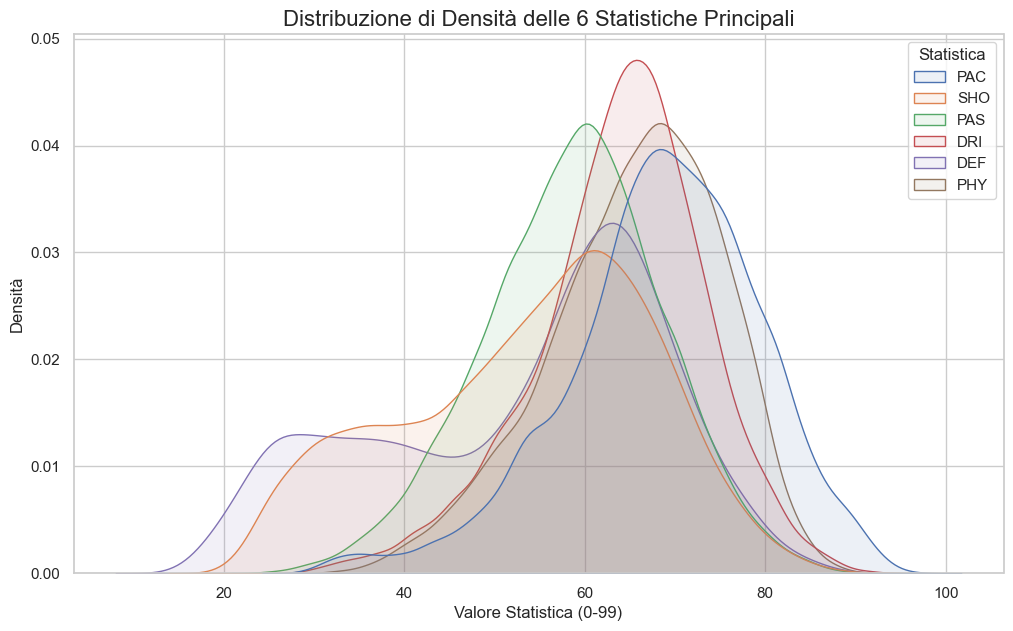

In [25]:
# --- CELLA 23: Distribuzione delle 6 Statistiche Principali (Giocatori di Movimento) ---

print("--- Distribuzione (KDE) delle 6 Statistiche Principali (solo Giocatori di Movimento) ---")

# 1. Rinominiamo le colonne per la leggibilità del grafico
rename_map_stats = {
    'Stat1_PAC_GK-DIV': 'PAC', 'Stat2_SHO_GK-HAN': 'SHO', 'Stat3_PAS_GK-KIC': 'PAS',
    'Stat4_DRI_GK-REF': 'DRI', 'Stat5_DEF_GK-SPD': 'DEF', 'Stat6_PHY_GK-POS': 'PHY'
}
df_outfield_renamed = df_outfield.rename(columns=rename_map_stats)
stats_cols = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

# 2. "Meltiamo" il DataFrame per portarlo in formato "long"
# Questo è necessario a seaborn per plottare più KDE insieme
df_melted = df_outfield_renamed[stats_cols].melt(var_name='Statistica', value_name='Valore')

# 3. Creiamo il grafico KDE (Kernel Density Estimate)
plt.figure(figsize=(12, 7))
sns.kdeplot(
    data=df_melted, 
    x='Valore', 
    hue='Statistica', # Crea una linea per ogni statistica
    fill=True,      # Colora l'area sotto la curva
    common_norm=False, # Normalizza ogni curva individualmente
    alpha=0.1        # Trasparenza
)
plt.title('Distribuzione di Densità delle 6 Statistiche Principali', fontsize=16)
plt.xlabel('Valore Statistica (0-99)', fontsize=12)
plt.ylabel('Densità', fontsize=12)
plt.show()

--- Distribuzione Giocatori per Ruolo (Tutte le posizioni) ---


/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_18705/343634023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


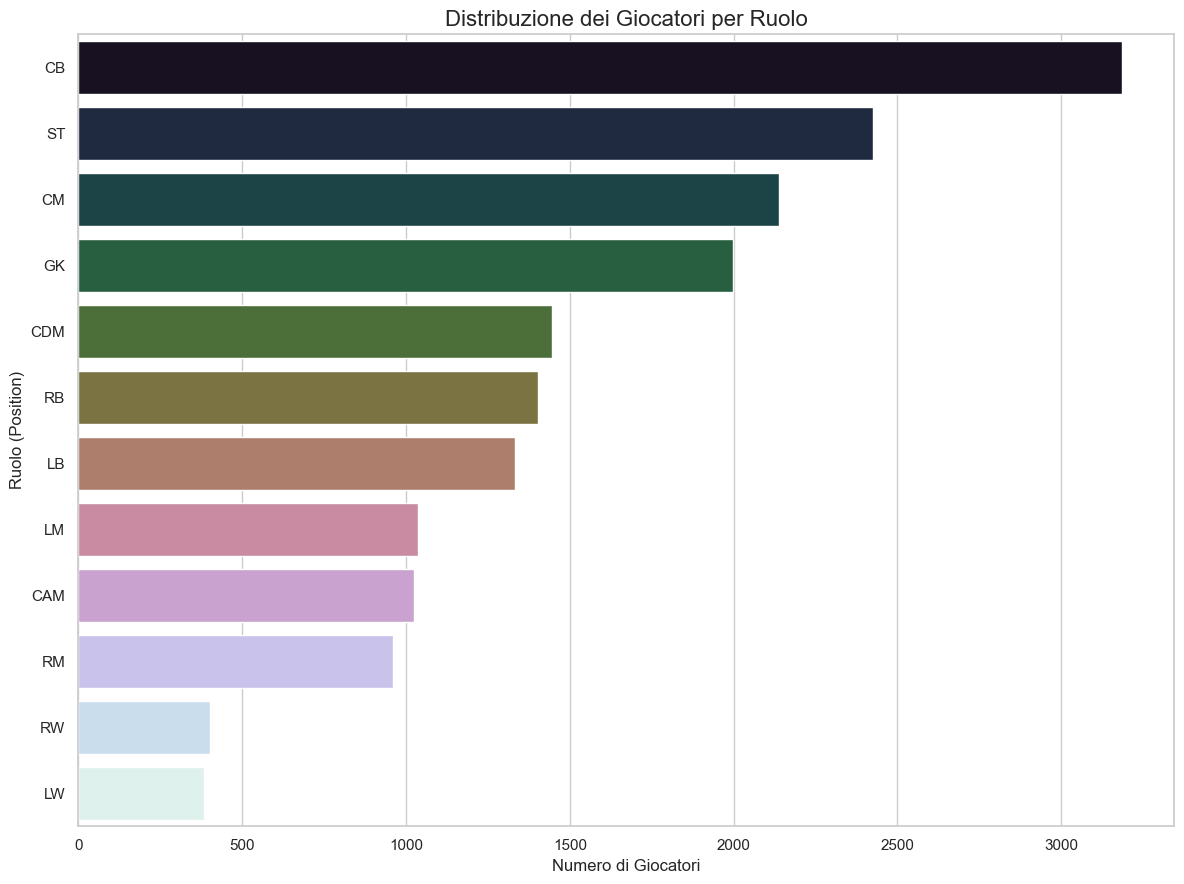

In [26]:
# --- CELLA 25: Visualizzazione - Distribuzione Giocatori per Ruolo ---

print("--- Distribuzione Giocatori per Ruolo (Tutte le posizioni) ---")

# 1. Calcoliamo i conteggi per tutte le posizioni
position_counts = df_cleaned['Position'].value_counts()

# 2. Creiamo il grafico a barre orizzontale
plt.figure(figsize=(12, 9))
sns.barplot(
    x=position_counts.values, 
    y=position_counts.index,
    palette='cubehelix' # Un'altra palette di colori
)
plt.title('Distribuzione dei Giocatori per Ruolo', fontsize=16)
plt.xlabel('Numero di Giocatori', fontsize=12)
plt.ylabel('Ruolo (Position)', fontsize=12)
plt.tight_layout()
plt.show()